# **Evaluación de modelos de clasificación**

En esta práctica, veremos cómo evaluar un modelo de clasificación con las diversas métricas vistas en la parte teórica.

Trabajaremos con uno de los datasets provisto por Scikit-learn referente a Iris.

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [26]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [27]:
len(y)

150

Ahora que definimos nuestras variables predictoras **X** y la etiqueta a predecir **y**, vamos a separar nuestros datos en entrenamiento y testeo. Utilizaremos el 20% del dataset para evaluar.

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
len(X_train)

120

Vamos a trabajar con un modelo de vecinos más cercanos. Seguimos el flujo de trabajo de ML en Scikit-learn.

In [29]:
from sklearn.neighbors import KNeighborsClassifier

# Instanciamos el modelo clasificador

classifier = KNeighborsClassifier(n_neighbors=40)

In [30]:
# Entrenamos el modelo. Para ello, usamos nuestro set de entrenamiento

classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=40)

In [31]:
# Predecimos sobre nuestro set de entrenamieto

y_train_pred = classifier.predict(X_train)

# Predecimos sobre nuestro set de testeo

y_test_pred = classifier.predict(X_test)

## **`Matriz de confusión`**

Veamos la matriz de nuestro modelo

In [32]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_train, y_train_pred)
matrix_2 = confusion_matrix(y_test, y_test_pred)

In [33]:
matrix

array([[40,  0,  0],
       [ 0, 39,  2],
       [ 0,  5, 34]])

*Grafiquemos la matriz*

In [34]:
from sklearn.metrics import ConfusionMatrixDisplay

cm_display = ConfusionMatrixDisplay(matrix)
cm_display_2 = ConfusionMatrixDisplay(matrix_2)


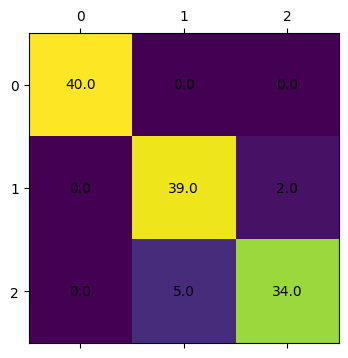

In [35]:
fig, ax = plt.subplots(figsize=(4,5))

ax.matshow(matrix)
for (i, j), z in np.ndenumerate(matrix):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')
plt.show()

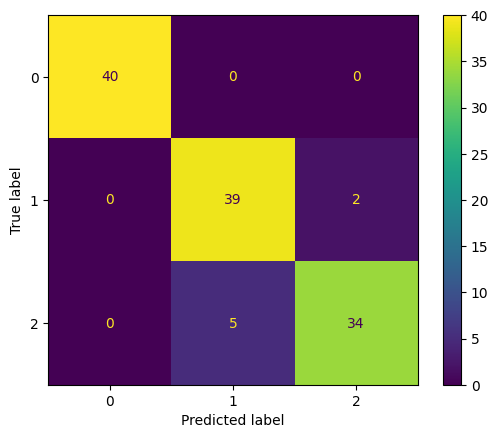

In [36]:
# Otra forma más sencilla de realizar la gráfica es la siguiente

cm_display.plot()
plt.show()

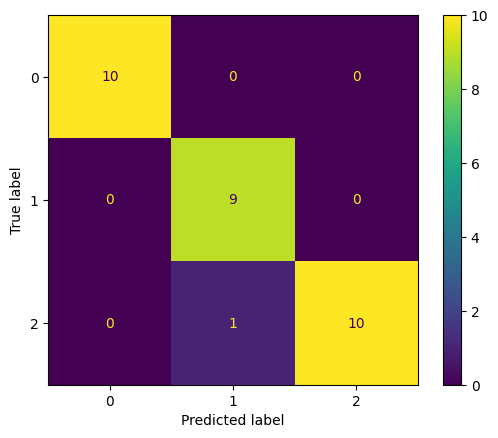

In [37]:
cm_display_2.plot()
plt.show()

### **`Exactitud`**

In [38]:
from sklearn.metrics import accuracy_score

exactitud = accuracy_score(y_test, y_test_pred)
print(exactitud)

0.9666666666666667


### **`Precisión`**

In [39]:
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_test_pred, average= None)
print(precision)


[1.  0.9 1. ]


### **`Exhaustividad/Recall/Sensibilidad`**

In [40]:
from sklearn.metrics import recall_score

precision = recall_score(y_test, y_test_pred, average= None)
print(precision)

[1.         1.         0.90909091]


### **`F1-Score`**

In [41]:
from sklearn.metrics import f1_score

precision = f1_score(y_test, y_test_pred, average= None)
print(precision, type(precision))

[1.         0.94736842 0.95238095] <class 'numpy.ndarray'>



### **`Curvas ROC`**


Dejamos [aquí](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html) la documentación pertinente.

Debemos trabajar con un método del preprocesamiento de datos -denominado *label_binarize*- que permita abordar un problema  de clasificación multiclase como si fuese binario. Esto lo hacemos ya que la métrica ROC se emplea para problemas binarios. Dejamos la [documentación](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.label_binarize.html) para que se interioricen un poco más acerca de esta función.

In [42]:
from sklearn.preprocessing import label_binarize

In [43]:
# Binarizamos y_test

y_test = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test.shape[1]
print(y_test[:5])

[[0 1 0]
 [1 0 0]
 [0 0 1]
 [0 1 0]
 [0 1 0]]


Hasta este momento, nosotros veníamos trabajando con el método `predict` para poder predecir una etiqueta para un registro.

Ahora veremos la funcionalidad de `predict_proba`, que indica la probabilidad de que una instancia pertenezca a una de las categorías de la variable de salida.

In [44]:
y_score = classifier.predict_proba(X_test)
print(y_score[:5])

[[0.    0.75  0.25 ]
 [1.    0.    0.   ]
 [0.    0.15  0.85 ]
 [0.    0.725 0.275]
 [0.    0.5   0.5  ]]


In [45]:
# Computamos los valores de FPR (Tasa de falsos positivos) y TPR (tasa de verdaderos positivos), para luego realizar
# el gráfico de la curva ROC.

from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

Pasamos a graficar

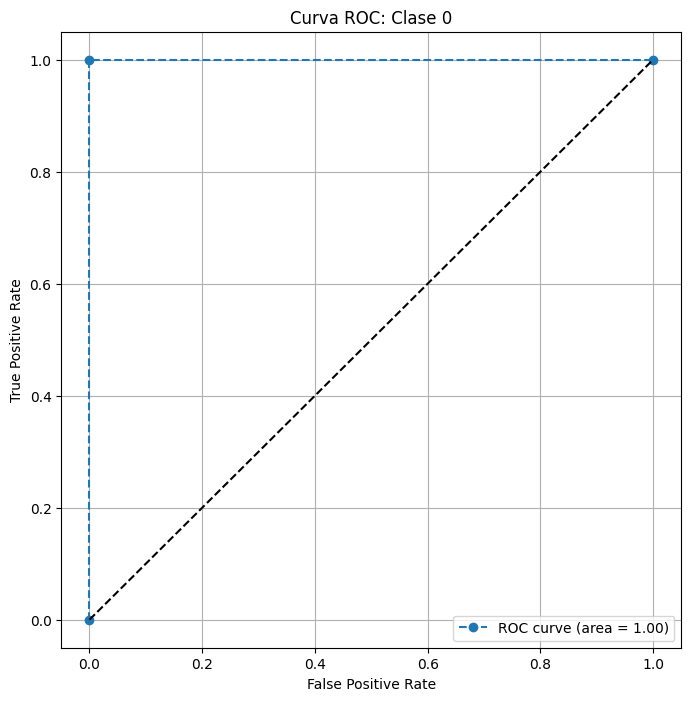

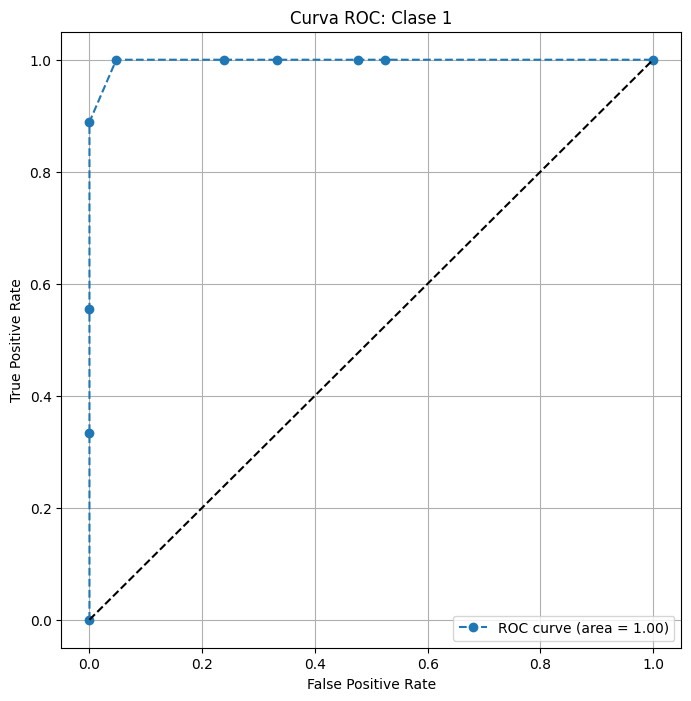

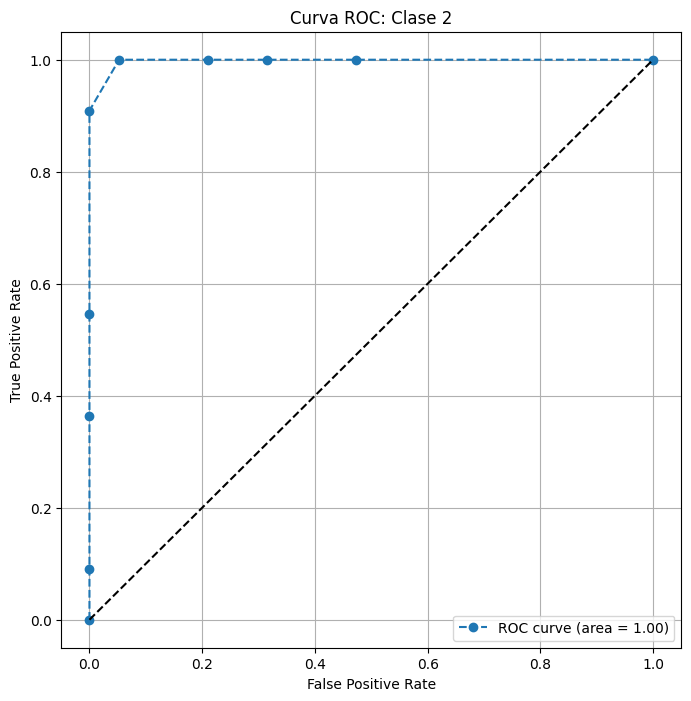

In [46]:
# Recorremos con un bucle cada una de las clases

for i in range(n_classes):
    plt.figure(figsize=(8,8))
    plt.plot(fpr[i], tpr[i],'o--', label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Curva ROC: Clase ' + str(i))
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()

In [47]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_auc_score


def multiclass_roc_auc_score(y_test, y_pred, average= 'macro'):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)

In [48]:
print('El AUC-ROC multiclase:',multiclass_roc_auc_score(y_test, y_test_pred))

El AUC-ROC multiclase: 0.976911976911977
